In [1]:
%matplotlib inline
import os
import copy
import io
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from IPython.display import SVG
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from rdkit import Chem
from rdkit import rdBase
from rdkit import RDPaths
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import PyMol
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdForceFieldHelpers
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdMolTransforms
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import SimilarityMaps
from sklearn.ensemble import RandomForestClassifier
from rdkit.Chem.Draw.rdMolDraw2D import MolDrawOptions

import rdkit
print(rdkit.__version__)

import torch
torch.cuda.is_available()

#plt.style.use("seaborn-notebook")
IPythonConsole.ipython_useSVG = True  # Use higher quality images for molecules

2024.09.6


In [25]:
import py3Dmol

In [2]:
def read_raw_sdf(filename):
    """Reads the entire content of an SDF file as a raw string."""
    try:
        with open(filename, 'r', encoding='utf-8') as fobj:
            raw_data = fobj.read()
            return raw_data
    except IOError as e:
        return f"Error reading file: {e}"

In [21]:
def display_sdf_molecules(sdf_filepath):
    """
    Reads a multi-molecule SDF file and displays each molecule 
    individually using py3Dmol in a Jupyter Notebook.
    """
    # Create an RDKit molecule supplier object to iterate through the SDF file
    supplier = Chem.SDMolSupplier(sdf_filepath)
    
    # Iterate through each molecule in the supplier
    for i, mol in enumerate(supplier):
        if mol is not None:
            # Convert RDKit Mol object to an SDF mol block string
            mol_block = Chem.MolToMolBlock(mol)
            
            # Create a new py3Dmol view for each molecule
            # Use the .addModel method with the mol block data and format type 'sdf'
            view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
            view.addModel(mol_block, 'sdf')
            
            # Optional: Apply a style (e.g., 'stick')
            #view.setStyle({'stick': {}})
            view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
            view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
            
            # Optional: Zoom to fit the molecule in the view
            view.zoomTo()
            
            print(f"Molecule {i+1}: {mol.GetProp('_Name') if mol.HasProp('_Name') else 'Unnamed'}")
            
            # Display the view (this works in Jupyter Notebooks)
            view.show()
            #view.render()
            
        else:
            print(f"Skipping a null molecule entry at index {i+1}")

In [3]:
import os, sys
root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(root)

F:\saif\dataset


In [4]:
import Auto3D
#options is a function that takes in all user-specified parameters, then return arguments for the main function
#main function takes in the arguments from the options function, then actually runs the Auto3D modules
from Auto3D.auto3D import options, main

In [5]:
#Always ensure that you have the latest version
print(Auto3D.__version__)

2.3.1


### Generate low-energy 3D structures with Auto3D

In [19]:
from Auto3D.SPE import calc_spe 
# Solid Phase Extraction (SPE) in chemistry (calculating recovery/efficiency by comparing 
# amounts before/after using solvents like methanol/water, as shown in)
from Auto3D.ASE.geometry import opt_geometry
from Auto3D.ASE.thermo import calc_thermo


In [6]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm1.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm1.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 2 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm1_20251205-094940-146152\sm1_out.sdf
F:\saif\dataset\materialsproject\files\sm1_20251205-094940-146152\sm1_out.sdf


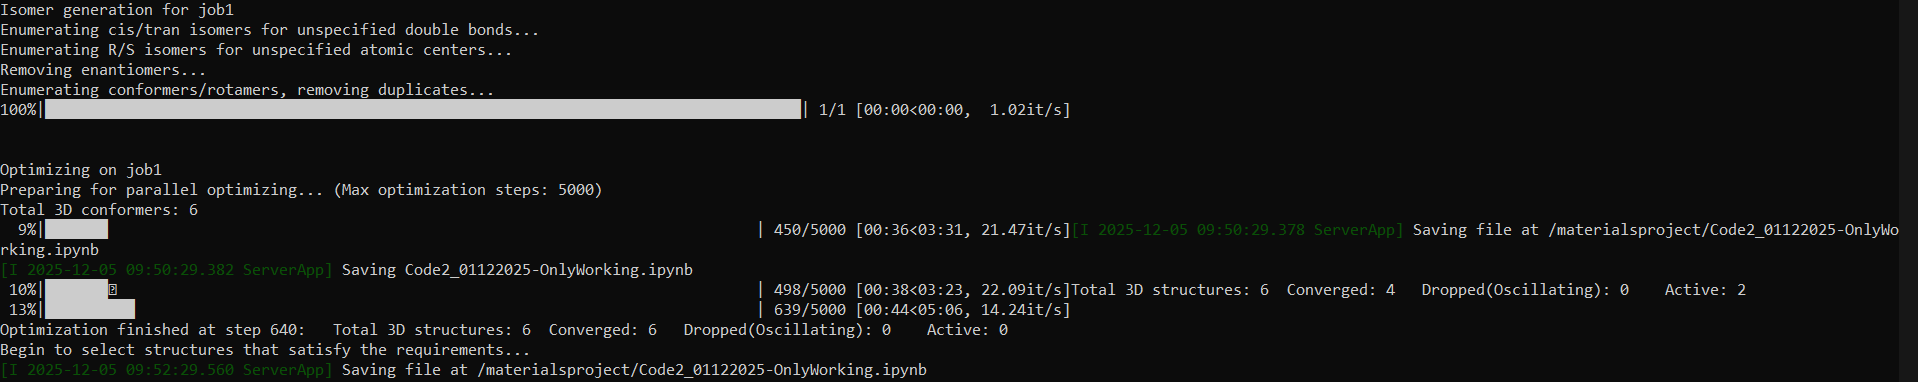

In [7]:
pwd

'F:\\saif\\dataset\\materialsproject'

In [14]:
sm1='files\sm1_20251205-094940-146152\sm1_out.sdf'
mols = Chem.SDMolSupplier(sm1) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [16]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm1)
print(sdf_content)

smi1
     RDKit          3D

 22 22  0  0  0  0  0  0  0  0999 V2000
    3.5436    0.0352    0.4832 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9071   -0.7734   -0.5509 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5676   -0.3431   -0.8631 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5185   -0.6928    0.1855 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8072   -1.4043    1.1218 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8666   -0.1604    0.0007 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2276    0.5930   -1.1122 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5267    1.0584   -1.2492 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4707    0.7744   -0.2746 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1152    0.0221    0.8377 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8210   -0.4445    0.9744 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6630    1.0547    0.1163 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.9848    0.0680    1.4224 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.5358   -0.3629 

In [18]:
mols

In [17]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 11 atoms


In [19]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[09:56:45] Molecule does not have explicit Hs. Consider calling AddHs()
[09:56:46] Molecule does not have explicit Hs. Consider calling AddHs()


In [20]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

SM2

In [22]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm2.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm2.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 3 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm2_20251205-101951-279323\sm2_out.sdf
F:\saif\dataset\materialsproject\files\sm2_20251205-101951-279323\sm2_out.sdf


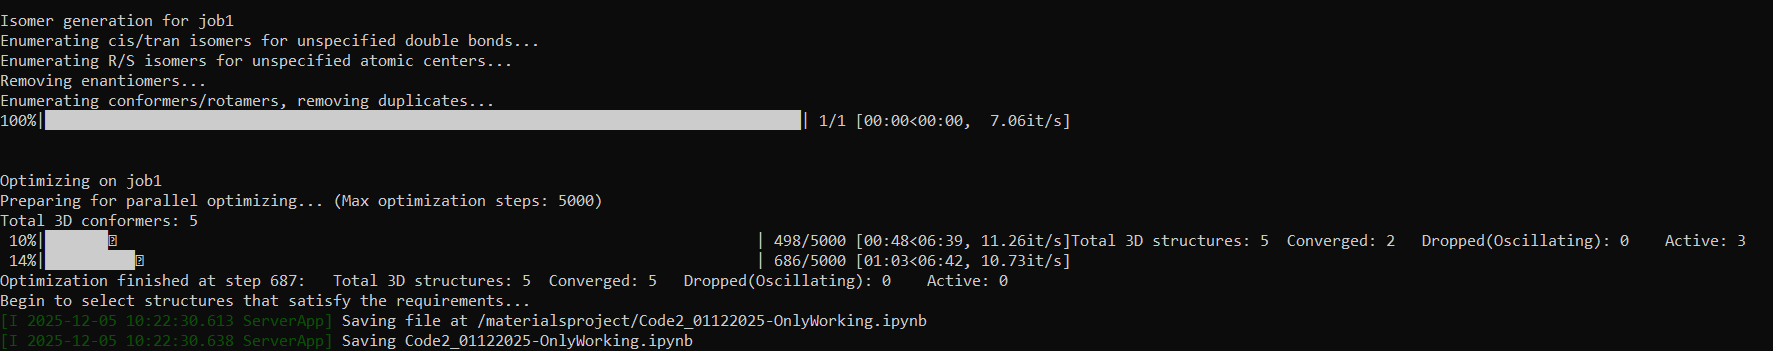

In [36]:
from IPython import display
display.Image("D:/C Drive Pictures/0785.png")

In [24]:
sm2='files\sm2_20251205-101951-279323\sm2_out.sdf'
mols = Chem.SDMolSupplier(sm2) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [25]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm2)
print(sdf_content)

smi2
     RDKit          3D

 13 12  0  0  0  0  0  0  0  0999 V2000
   -1.9140   -0.0887    0.0280 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5084    0.4346    0.2611 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5730   -0.4862   -0.2695 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9956   -0.0083   -0.0949 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3131   -1.5384   -0.8009 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0478   -1.0557    0.5068 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1026   -0.2228   -1.0346 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6554    0.6007    0.4264 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3668    1.4136   -0.2032 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3148    0.5877    1.3260 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6847   -0.7504   -0.4831 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1379    0.9364   -0.6207 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2055    0.1772    0.9587 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  

In [26]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 5 atoms


In [27]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[10:24:50] Molecule does not have explicit Hs. Consider calling AddHs()
[10:24:50] Molecule does not have explicit Hs. Consider calling AddHs()


In [28]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm3.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm3.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 1 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm3_20251205-103432-355193\sm3_out.sdf
F:\saif\dataset\materialsproject\files\sm3_20251205-103432-355193\sm3_out.sdf


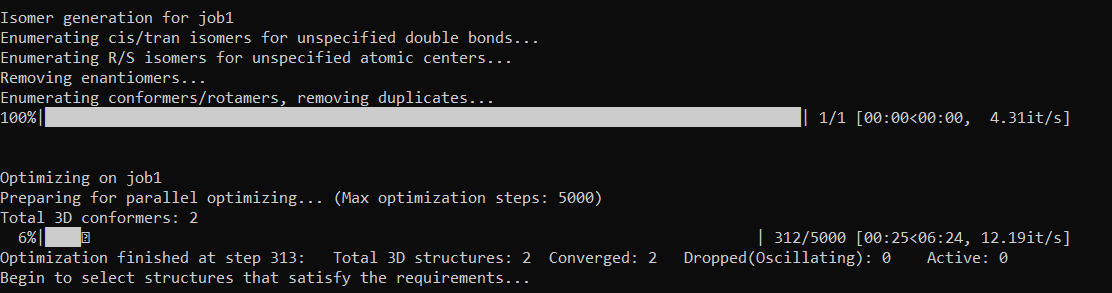

In [38]:
from IPython import display
display.Image("D:/C Drive Pictures/0786.png")

In [39]:
sm3='files\sm3_20251205-103432-355193\sm3_out.sdf'
mols = Chem.SDMolSupplier(sm3) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [40]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm3)
print(sdf_content)

smi3
     RDKit          3D

 15 14  0  0  0  0  0  0  0  0999 V2000
   -2.9997    0.0400    0.0480 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5838   -0.2877    0.3768 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5239    0.2360   -0.2271 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8421   -0.1614    0.1747 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1203   -0.9379    1.0536 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.7670    0.4637   -0.5809 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.1246    0.1411   -0.2679 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5340   -0.8562   -0.2688 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5180    0.4197    0.9287 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0614    0.7823   -0.7430 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4085   -1.0079    1.1666 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6114    0.9602   -1.0256 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.7297    0.6981   -0.9744 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.3602    0.4368 

In [41]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 7 atoms


In [42]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[10:50:23] Molecule does not have explicit Hs. Consider calling AddHs()
[10:50:23] Molecule does not have explicit Hs. Consider calling AddHs()


In [43]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [31]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm4.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm4.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 7 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm4_20251205-103507-258220\sm4_out.sdf
F:\saif\dataset\materialsproject\files\sm4_20251205-103507-258220\sm4_out.sdf


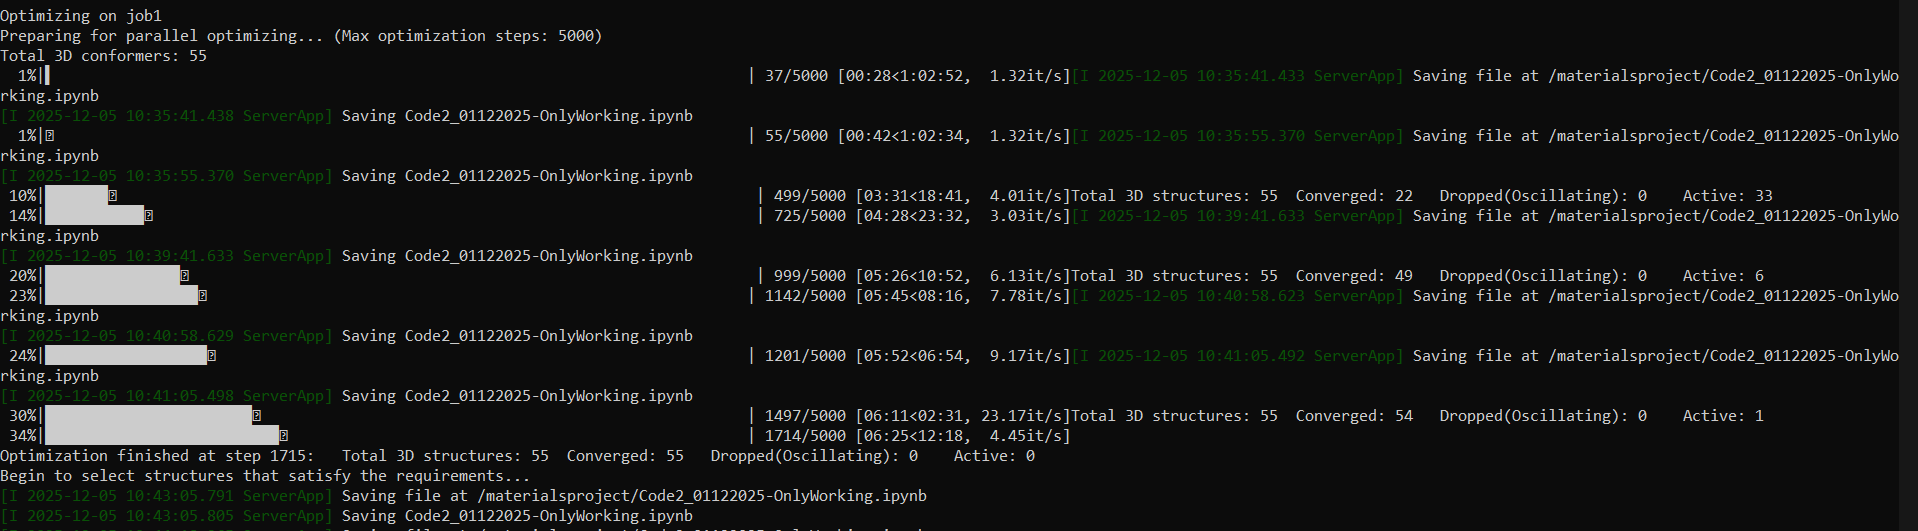

In [44]:
from IPython import display
display.Image("D:/C Drive Pictures/0787.png")

In [45]:
sm4='files\sm4_20251205-103507-258220\sm4_out.sdf'
mols = Chem.SDMolSupplier(sm4) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [46]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm4)
print(sdf_content)

smi4
     RDKit          3D

 20 19  0  0  0  0  0  0  0  0999 V2000
    3.1302    0.2107    0.9994 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0298   -0.4395    0.2211 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2721    0.1673   -0.6805 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1550   -0.4917   -1.4427 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1626    0.1653   -1.0605 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6319    1.0736   -1.7012 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8239   -0.3746    0.1871 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9577    0.4948    0.6994 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9418    0.1431    2.0711 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.2274    1.2608    0.7338 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.0848   -0.2817    0.8128 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8558   -1.4939    0.4182 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4301    1.2190   -0.8964 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2958   -0.3601 

In [47]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 8 atoms


In [48]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[10:52:51] Molecule does not have explicit Hs. Consider calling AddHs()
[10:52:51] Molecule does not have explicit Hs. Consider calling AddHs()


In [49]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm5.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm5.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 3 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm5_20251205-223654-340917\sm5_out.sdf
F:\saif\dataset\materialsproject\files\sm5_20251205-223654-340917\sm5_out.sdf


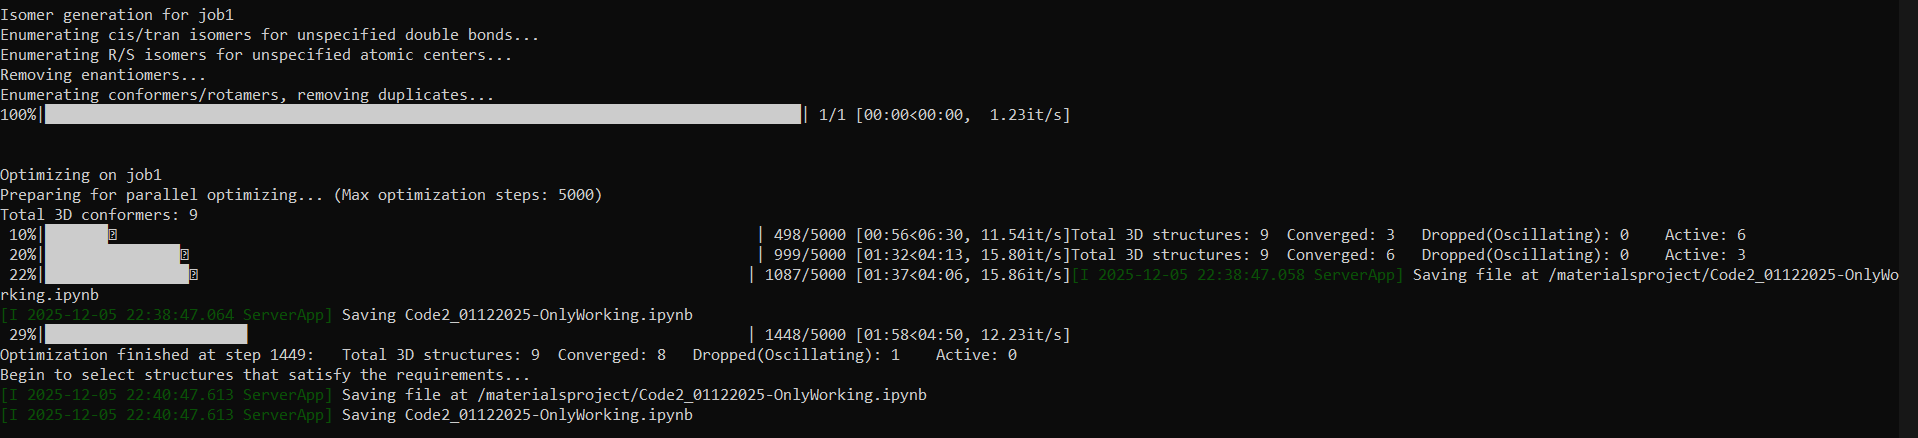

In [9]:
from IPython import display
display.Image("D:/C Drive Pictures/0789.png")

In [12]:
sm5='files\sm5_20251205-223654-340917\sm5_out.sdf'
mols = Chem.SDMolSupplier(sm5) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [20]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm5)
print(sdf_content)

smi5
     RDKit          3D

 24 24  0  0  0  0  0  0  0  0999 V2000
   -0.6900    0.6112   -0.6603 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7989   -0.3741    0.0352 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9582   -0.9178    0.4552 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2602   -0.4256    0.0268 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6342    0.9413    0.5960 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0880    2.0209   -0.1239 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.2557   -1.0955    0.5064 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5206   -0.6270    0.1374 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1177   -1.1452   -0.9929 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3808   -0.6948   -1.3455 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0235    0.2588   -0.5703 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4059    0.7596    0.5664 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1435    0.3159    0.9287 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8906   -1.7548 

In [21]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 13 atoms


In [22]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[22:47:54] Molecule does not have explicit Hs. Consider calling AddHs()
[22:47:54] Molecule does not have explicit Hs. Consider calling AddHs()


In [23]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

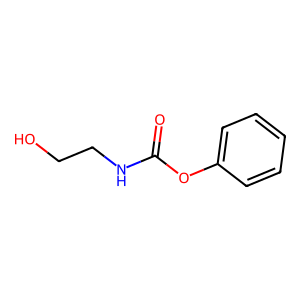

In [35]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('O=C(NCCO)OC1=CC=CC=C1')
img = Draw.MolToImage(m)
img

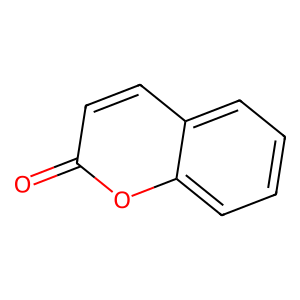

In [11]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('O=C1OC2=CC=CC=C2C=C1') #Coumarin
img = Draw.MolToImage(m)
img

In [7]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm5.smi") # You can specify the path to your file here
    args = options(path, k=8, use_gpu=False) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm5.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 9 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm5_20251218-120237-507504\sm5_out.sdf
F:\saif\dataset\materialsproject\files\sm5_20251218-120237-507504\sm5_out.sdf


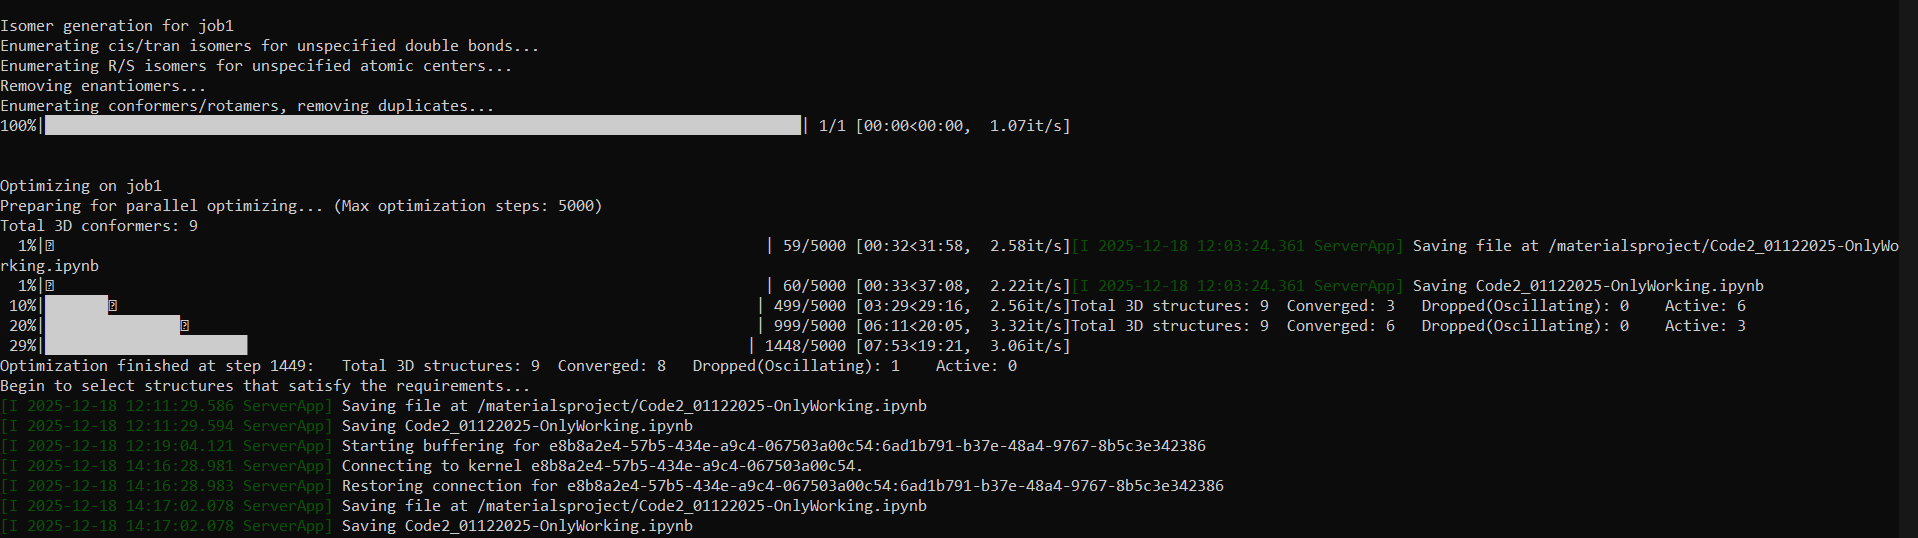

In [8]:
from IPython import display
display.Image("D:/C Drive Pictures/0801.png")

In [9]:
sm5='files\sm5_20251218-120237-507504\sm5_out.sdf'
mols = Chem.SDMolSupplier(sm5) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [10]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm5)
print(sdf_content)

smi5
     RDKit          3D

 24 24  0  0  0  0  0  0  0  0999 V2000
   -0.6900    0.6112   -0.6603 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7989   -0.3741    0.0352 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9582   -0.9178    0.4552 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2602   -0.4256    0.0268 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6342    0.9413    0.5960 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0880    2.0209   -0.1239 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.2557   -1.0955    0.5064 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5206   -0.6270    0.1374 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1177   -1.1452   -0.9929 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3808   -0.6948   -1.3455 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0235    0.2588   -0.5703 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4059    0.7596    0.5664 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1435    0.3159    0.9287 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8906   -1.7548 

In [11]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms
Molecule has 13 atoms


In [12]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling AddHs()
[14:18:20] Molecule does not have explicit Hs. Consider calling 

In [13]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

def display_sdf_molecules(sdf_filepath):
    """
    Reads a multi-molecule SDF file and displays each molecule 
    individually using py3Dmol in a Jupyter Notebook.
    """
    # Create an RDKit molecule supplier object to iterate through the SDF file
    supplier = Chem.SDMolSupplier(sdf_filepath)
    
    # Iterate through each molecule in the supplier
    for i, mol in enumerate(supplier):
        if mol is not None:
            # Convert RDKit Mol object to an SDF mol block string
            mol_block = Chem.MolToMolBlock(mol)
            
            # Create a new py3Dmol view for each molecule
            # Use the .addModel method with the mol block data and format type 'sdf'
            view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
            view.addModel(mol_block, 'sdf')
            
            # Optional: Apply a style (e.g., 'stick')
            #view.setStyle({'stick': {}})
            view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
            view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
            
            # Optional: Zoom to fit the molecule in the view
            view.zoomTo()
            
            print(f"Molecule {i+1}: {mol.GetProp('_Name') if mol.HasProp('_Name') else 'Unnamed'}")
            
            # Display the view (this works in Jupyter Notebooks)
            view.show()
            #view.render()
            
        else:
            print(f"Skipping a null molecule entry at index {i+1}")

# --- Example Usage ---
# Replace 'your_molecules.sdf' with the path to your actual SDF file
sdf_file_path = 'files\sm5_20251218-120237-507504\sm5_out.sdf' 
display_sdf_molecules(sdf_file_path)

Molecule 1: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 2: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 3: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 4: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 5: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 6: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 7: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 8: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

def display_sdf_molecules(sdf_filepath):
    """
    Reads a multi-molecule SDF file and displays each molecule 
    individually using py3Dmol in a Jupyter Notebook.
    """
    # Create an RDKit molecule supplier object to iterate through the SDF file
    supplier = Chem.SDMolSupplier(sdf_filepath)
    
    # Iterate through each molecule in the supplier
    for i, mol in enumerate(supplier):
        if mol is not None:
            # Convert RDKit Mol object to an SDF mol block string
            mol_block = Chem.MolToMolBlock(mol)
            
            # Create a new py3Dmol view for each molecule
            # Use the .addModel method with the mol block data and format type 'sdf'
            view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
            view.addModel(mol_block, 'sdf')
            
            # Optional: Apply a style (e.g., 'stick')
            #view.setStyle({'stick': {}})
            view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
            view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
            
            # Optional: Zoom to fit the molecule in the view
            view.zoomTo()
            
            print(f"Molecule {i+1}: {mol.GetProp('_Name') if mol.HasProp('_Name') else 'Unnamed'}")
            
            # Display the view (this works in Jupyter Notebooks)
            view.show()
            #view.render()
            
        else:
            print(f"Skipping a null molecule entry at index {i+1}")

# --- Example Usage ---
# Replace 'your_molecules.sdf' with the path to your actual SDF file
sdf_file_path = 'files\sm5_20251218-120237-507504\sm5_out.sdf' 
#display_sdf_molecules(sdf_file_path)
spe = calc_spe(sdf_file_path, model_name="ANI2x")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry
spe = calc_spe(sdf_file_path, model_name="ANI2xt")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry
spe = calc_spe(sdf_file_path, model_name="AIMNET")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry

files\sm5_20251218-120237-507504\sm5_out_ANI2x_E.sdf
files\sm5_20251218-120237-507504\sm5_out_ANI2xt_E.sdf
files\sm5_20251218-120237-507504\sm5_out_AIMNET_E.sdf


In [14]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

def display_sdf_molecules(sdf_filepath):
    """
    Reads a multi-molecule SDF file and displays each molecule 
    individually using py3Dmol in a Jupyter Notebook.
    """
    # Create an RDKit molecule supplier object to iterate through the SDF file
    supplier = Chem.SDMolSupplier(sdf_filepath)
    
    # Iterate through each molecule in the supplier
    for i, mol in enumerate(supplier):
        if mol is not None:
            # Convert RDKit Mol object to an SDF mol block string
            mol_block = Chem.MolToMolBlock(mol)
            
            # Create a new py3Dmol view for each molecule
            # Use the .addModel method with the mol block data and format type 'sdf'
            view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
            view.addModel(mol_block, 'sdf')
            
            # Optional: Apply a style (e.g., 'stick')
            #view.setStyle({'stick': {}})
            view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
            view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
            
            # Optional: Zoom to fit the molecule in the view
            view.zoomTo()
            
            print(f"Molecule {i+1}: {mol.GetProp('_Name') if mol.HasProp('_Name') else 'Unnamed'}")
            
            # Display the view (this works in Jupyter Notebooks)
            view.show()
            #view.render()
            
        else:
            print(f"Skipping a null molecule entry at index {i+1}")

# --- Example Usage ---
# Replace 'your_molecules.sdf' with the path to your actual SDF file
sdf_file_path = 'files\sm5_20251218-120237-507504\sm5_out_ANI2x_E.sdf' 
display_sdf_molecules(sdf_file_path)
#spe = calc_spe(sdf_file_path, model_name="ANI2x")
#print(spe)  #SPE are stored in the SDF file under the E_hartree entry
#spe = calc_spe(sdf_file_path, model_name="ANI2xt")
#print(spe)  #SPE are stored in the SDF file under the E_hartree entry
#spe = calc_spe(sdf_file_path, model_name="AIMNET")
#print(spe)  #SPE are stored in the SDF file under the E_hartree entry

Molecule 1: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 2: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 3: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 4: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 5: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 6: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 7: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule 8: smi5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Geometry optimization

In [ ]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}}, viewer=(0,0))
view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
#view.getLegendColour()
#view.setStyle({'sphere':{}}, viewer=(0,2))
#view.zoomTo()
#view.show()
view.render()

In [25]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import display

def display_sdf_molecules(sdf_file_path):
    """
    Reads molecules from a multi-molecule SDF file and displays each one 
    using py3dmol in a Jupyter Notebook environment.
    """
    
    # Use RDKit's SDMolSupplier to read the SDF file
    # It acts as an iterator over all molecules in the file
    supplier = Chem.SDMolSupplier(sdf_file_path)
    
    if supplier is None:
        print(f"Error: Could not read the file {sdf_file_path}")
        return

    print(f"Processing molecules from: {sdf_file_path}")

    # Iterate through each molecule
    for i, mol in enumerate(supplier):
        if mol is None:
            print(f"Warning: Could not process molecule {i+1}, skipping.")
            continue
            
        # Get the molecule title (if available) or assign an index
        mol_title = mol.GetProp("_Name") if mol.HasProp("_Name") else f"Molecule {i+1}"
        print(f"\n--- Displaying {mol_title} ---")

        # Convert the RDKit molecule to an SDF/MOL block string, which py3dmol uses
        mol_block = Chem.MolToMolBlock(mol)

        # Create a py3dmol view object
        view = py3Dmol.view(width=400, height=400)
        
        # Add the molecule model to the view
        view.addModel(mol_block, 'sdf')
        
        # Apply a style for visualization (e.g., stick style is common for small molecules)
        # You can adjust this to 'sphere', 'line', etc.
        view.setStyle({"stick": {}})
        
        # Zoom to fit the molecule in the view
        view.zoomTo()
        
        # Display the view in the output cell
        display(view.show())

# Example usage:
# Replace 'your_molecules.sdf' with the path to your actual SDF file.
# You can download sample SDF files from resources like PubChem.
display_sdf_molecules('files\sm5_20251218-120237-507504\sm5_out.sdf') 


Processing molecules from: files\sm5_20251218-120237-507504\sm5_out.sdf

--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None


--- Displaying smi5 ---


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

None

In [29]:
#suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in mols:
  print(mol.GetNumAtoms())

13


In [31]:
mols = [x for x in mols]
len(mols)

1

In [32]:
mols[0].GetNumAtoms()

13

In [33]:
with Chem.SDMolSupplier(sm5) as suppl: #('data/5ht3ligs.sdf') as suppl:
  for mol in suppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

13


In [34]:
inf = open(sm5,'rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  for mol in fsuppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

13


In [ ]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

In [22]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm6.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=True, gpu_idx=0, opt_steps=10000) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm6.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 4 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 43 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm6_20251206-101639-523612\sm6_out.sdf
F:\saif\dataset\materialsproject\files\sm6_20251206-101639-523612\sm6_out.sdf


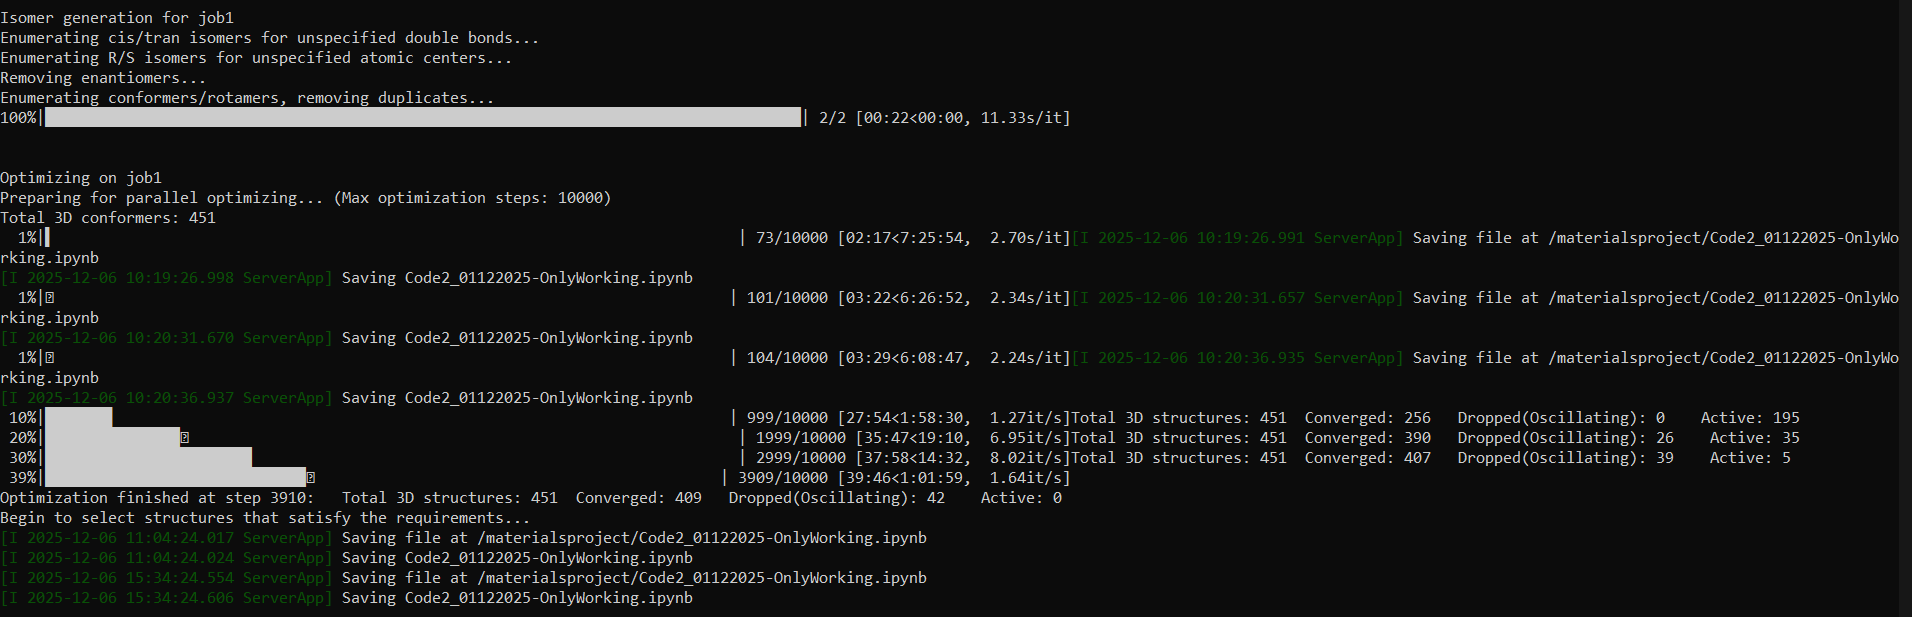

In [24]:
from IPython import display
display.Image("D:/C Drive Pictures/0791.png")

In [25]:
sm6='files\sm6_20251206-101639-523612\sm6_out.sdf'
mols = Chem.SDMolSupplier(sm6) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [26]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm6)
print(sdf_content)

CBD
     RDKit          3D

 53 56  0  0  0  0  0  0  0  0999 V2000
   -6.5739    1.5472   -0.1706 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3904    0.9553    0.2022 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1972   -0.4047    0.3426 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9409   -0.8941    0.6848 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8751   -0.0337    0.9044 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4763   -0.5339    1.1710 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9123   -1.4098    0.0367 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.4829   -1.8439    0.3542 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5341   -1.6105   -0.4243 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8947   -2.0993   -0.0929 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3322   -2.2314    1.2222 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.6102   -2.6936    1.5047 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4659   -3.0404    0.4784 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.7421   -3.5133  

In [27]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 31 atoms


In [28]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[15:34:59] Molecule does not have explicit Hs. Consider calling AddHs()
[15:34:59] Molecule does not have explicit Hs. Consider calling AddHs()


In [29]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

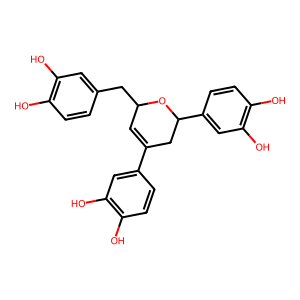

In [30]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('C1=CC(=C(C=C1CC2C=C(CC(O2)C3=CC(=C(C=C3)O)O)C4=CC(=C(C=C4)O)O)O)O') #CBD
img = Draw.MolToImage(m)
img

In [47]:
from rdkit.Chem import Draw

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
import numpy as np


m = Chem.MolFromSmiles('C1=CC(=C(C=C1CC2C=C(CC(O2)C3=CC(=C(C=C3)O)O)C4=CC(=C(C=C4)O)O)O)O')
#Chem.AddHs(m)
#img = Draw.MolToImage(m)
#img

AllChem.EmbedMolecule(m, randomSeed=42) # Generate 3D coordinates
AllChem.MMFFOptimizeMolecule(m) # Optional: optimize the structure for better accuracy
# Get the conformer (contains the coordinates)
conf = m.GetConformer()

atom_idx1 = 0
atom_idx2 = 1

if m.GetBondBetweenAtoms(atom_idx1, atom_idx2):
    bond_length = rdMolTransforms.GetBondLength(conf, atom_idx1, atom_idx2)
    print(f"The bond length between atom {atom_idx1} and {atom_idx2} is: {bond_length:.4f} Angstroms")
else:
    print(f"Atoms {atom_idx1} and {atom_idx2} are not directly bonded. Use the end-to-end method.")

# To find the end-to-end distance between any two atoms (e.g., atom 0 and atom 5)
atom_idx_a = 0
atom_idx_b = 5

# Get the coordinates of the two atoms
pos_a = conf.GetAtomPosition(atom_idx_a)
pos_b = conf.GetAtomPosition(atom_idx_b)

# Convert to a numpy array for easier calculation
coords_a = np.array([pos_a.x, pos_a.y, pos_a.z])
coords_b = np.array([pos_b.x, pos_b.y, pos_b.z])

# Calculate the Euclidean distance
end_to_end_distance = np.linalg.norm(coords_a - coords_b)
print(f"The end-to-end distance between atom {atom_idx_a} and {atom_idx_b} is: {end_to_end_distance:.4f} Angstroms")

distance_matrix = AllChem.Get3DDistanceMatrix(m)
# Access the distance between atom i and j (e.g., 0 and 5)
distance_0_5 = distance_matrix[0, 5]
print(f"Distance from matrix between atom 0 and 5: {distance_0_5:.4f} Angstroms")


#img = Draw.MolToImage(m)
#img

The bond length between atom 0 and 1 is: 1.3935 Angstroms
The end-to-end distance between atom 0 and 5 is: 1.3969 Angstroms
Distance from matrix between atom 0 and 5: 1.3969 Angstroms


[15:56:21] Molecule does not have explicit Hs. Consider calling AddHs()
[15:56:21] Molecule does not have explicit Hs. Consider calling AddHs()


### Single point energy (SPE) calculation 

In [15]:
sdf_file_path='files\sm6_20251206-101639-523612\sm6_out.sdf'
#sdf_file_path = 'files\sm5_20251218-120237-507504\sm5_out.sdf' 
#display_sdf_molecules(sdf_file_path)
spe = calc_spe(sdf_file_path, model_name="ANI2x")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry
spe = calc_spe(sdf_file_path, model_name="ANI2xt")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry
spe = calc_spe(sdf_file_path, model_name="AIMNET")
print(spe)  #SPE are stored in the SDF file under the E_hartree entry

files\sm6_20251206-101639-523612\sm6_out_ANI2x_E.sdf
files\sm6_20251206-101639-523612\sm6_out_ANI2xt_E.sdf
files\sm6_20251206-101639-523612\sm6_out_AIMNET_E.sdf


In [18]:
sdf_file_path = 'files\sm6_20251206-101639-523612\sm6_out_ANI2x_E.sdf' 
display_sdf_molecules(sdf_file_path)

Molecule 1: CBD


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
sdf_file_path = 'files\sm6_20251206-101639-523612\sm6_out_ANI2xt_E.sdf' 
display_sdf_molecules(sdf_file_path)

Molecule 1: CBD


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
sdf_file_path = 'files\sm6_20251206-101639-523612\sm6_out_AIMNET_E.sdf' 
display_sdf_molecules(sdf_file_path)

Molecule 1: CBD


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Geometry optimization

In [20]:
sdf_file_path='files\sm6_20251206-101639-523612\sm6_out.sdf'
optimized = opt_geometry(sdf_file_path, model_name="AIMNET", opt_tol=0.002)
print(optimized)

Preparing for parallel optimizing... (Max optimization steps: 5000)
Total 3D conformers: 1


  4%|██████▍                                                                                                                                                                   | 189/5000 [00:26<11:13,  7.14it/s]


Optimization finished at step 190:   Total 3D structures: 1  Converged: 1   Dropped(Oscillating): 0    Active: 0
files\sm6_20251206-101639-523612\sm6_out_userNNP_opt.sdf


In [23]:
sdf_file_path = 'files\sm6_20251206-101639-523612\sm6_out_userNNP_opt.sdf' 
sdf_content = read_raw_sdf(sdf_file_path)
print(sdf_content)
display_sdf_molecules(sdf_file_path)

CBD
     RDKit          3D

 53 56  0  0  0  0  0  0  0  0999 V2000
   -6.5620    1.5555   -0.2160 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3842    0.9612    0.1709 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1869   -0.4003    0.2872 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9353   -0.8902    0.6457 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8788   -0.0297    0.9055 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4815   -0.5279    1.1850 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9128   -1.4106    0.0587 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.4867   -1.8319    0.3747 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5307   -1.6089   -0.4164 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8945   -2.0922   -0.0911 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3490   -2.1928    1.2210 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.6299   -2.6504    1.4975 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4711   -3.0244    0.4687 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.7488   -3.4954  

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
"""
If the thermodynamic properties are calculated in 298 K, it's straightforward to get the thermodynamic properties.
"""

"""
  0%|                                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:274: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calculator)
F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:173: FutureWarning: Please use atoms.calc
  vib = vib_hessian(mol, atoms.get_calculator(), model, device, model_name=model_name)
F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:132: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(ase_calculator)
"""

sdf_file_path='files\sm6_20251206-101639-523612\sm6_out.sdf'
out_thermo = calc_thermo(sdf_file_path, "AIMNET", opt_tol=0.003)
print(out_thermo)  #enthalpy, entropy and Gibbs free energy are stored in the SDF file

  0%|                                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:274: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calculator)
F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:173: FutureWarning: Please use atoms.calc
  vib = vib_hessian(mol, atoms.get_calculator(), model, device, model_name=model_name)
F:\saif\saif2\lib\site-packages\Auto3D\ASE\thermo.py:132: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(ase_calculator)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.62s/it]

Enthalpy components at T = 298.00 K:
E_pot             -39603.074 eV
E_ZPE                 11.418 eV
Cv_trans (0->T)        0.039 eV
Cv_rot (0->T)          0.039 eV
Cv_vib (0->T)          0.676 eV
(C_v -> C_p)           0.026 eV
-------------------------------
H                 -39590.877 eV
Entropy components at T = 298.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0019096 eV/K        0.569 eV
S_rot              0.0015940 eV/K        0.475 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0044029 eV/K        1.312 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0079054 eV/K        2.356 eV
Enthalpy components at T = 298.00 K:
E_pot             -39603.074 eV
E_ZPE                 11.418 eV
Cv_trans (0->T)        0.039 eV
Cv_rot (0->T)          0.039 eV
Cv_vib (0->T)          0.676 eV
(C_v -> C_p)           0.026 eV
-------------------------

In [ ]:
files\sm6_20251206-101639-523612\sm6_out_AIMNET_G.sdf

True

In [13]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm7.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=True, gpu_idx=0, opt_steps=6000) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm7.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 4 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 1 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm7_20251206-101057-951318\sm7_out.sdf
F:\saif\dataset\materialsproject\files\sm7_20251206-101057-951318\sm7_out.sdf


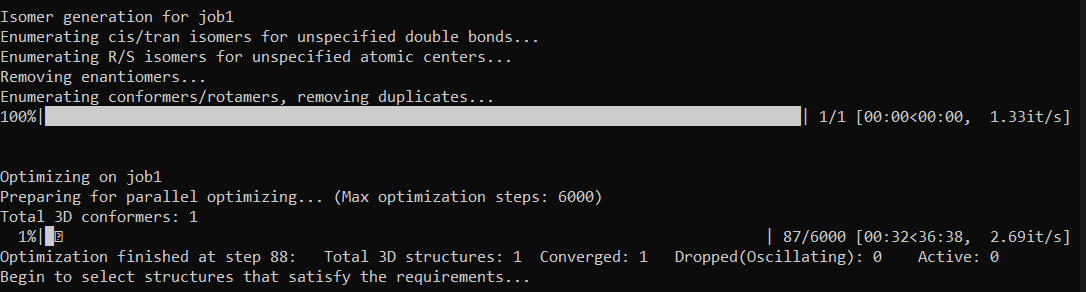

In [14]:
from IPython import display
display.Image("D:/C Drive Pictures/0790.png")

In [15]:
sm7='files\sm7_20251206-101057-951318\sm7_out.sdf'
mols = Chem.SDMolSupplier(sm7) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [18]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm7)
print(sdf_content)

Coumarin
     RDKit          3D

 17 18  0  0  0  0  0  0  0  0999 V2000
    3.4998    1.4095   -0.2353 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4962    0.7699   -0.1131 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4375   -0.6543    0.2165 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2702   -1.2947    0.3345 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0253   -0.5889    0.1376 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2338   -1.1882    0.2437 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3822   -0.4530    0.0424 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2876    0.9036   -0.2705 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0550    1.5163   -0.3804 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0950    0.7656   -0.1755 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2884    1.4118   -0.2942 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.3916   -1.1364    0.3538 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.2369   -2.3475    0.5784 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2874   -2.2

In [19]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
       else:
           print("Failed to read a molecule from the SDF file.")

Molecule has 11 atoms


In [20]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[10:13:17] Molecule does not have explicit Hs. Consider calling AddHs()
[10:13:17] Molecule does not have explicit Hs. Consider calling AddHs()


In [21]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

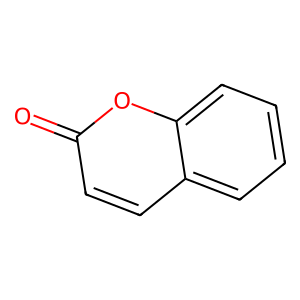

In [9]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('O=C1C=Cc2ccccc2O1') #Coumarin
img = Draw.MolToImage(m)
img

##### ----------------------------------------------------------------------------------------

In [8]:
if __name__ == "__main__":
    path = os.path.join(root, "materialsproject/files/sm8.smi") # You can specify the path to your file here
    args = options(path, k=1, use_gpu=True, gpu_idx=0, opt_steps=10000) #, optimizing_engine=AIMNET) # specify the parameters for Auto3D 
    out = main(args) # main accepts the parameters and run Auto3D
    print(out)
    #os._exit()

Checking input file...
	There are 1 SMILES in the input file F:\saif\dataset\materialsproject/files/sm8.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt, AIMNET or your own NNP.
The available memory is 4 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 1
Energy unit: Hartree if implicit.
Program running time: 39 minute(s)
Output path: F:\saif\dataset\materialsproject\files\sm8_20251207-135906-822810\sm8_out.sdf
F:\saif\dataset\materialsproject\files\sm8_20251207-135906-822810\sm8_out.sdf


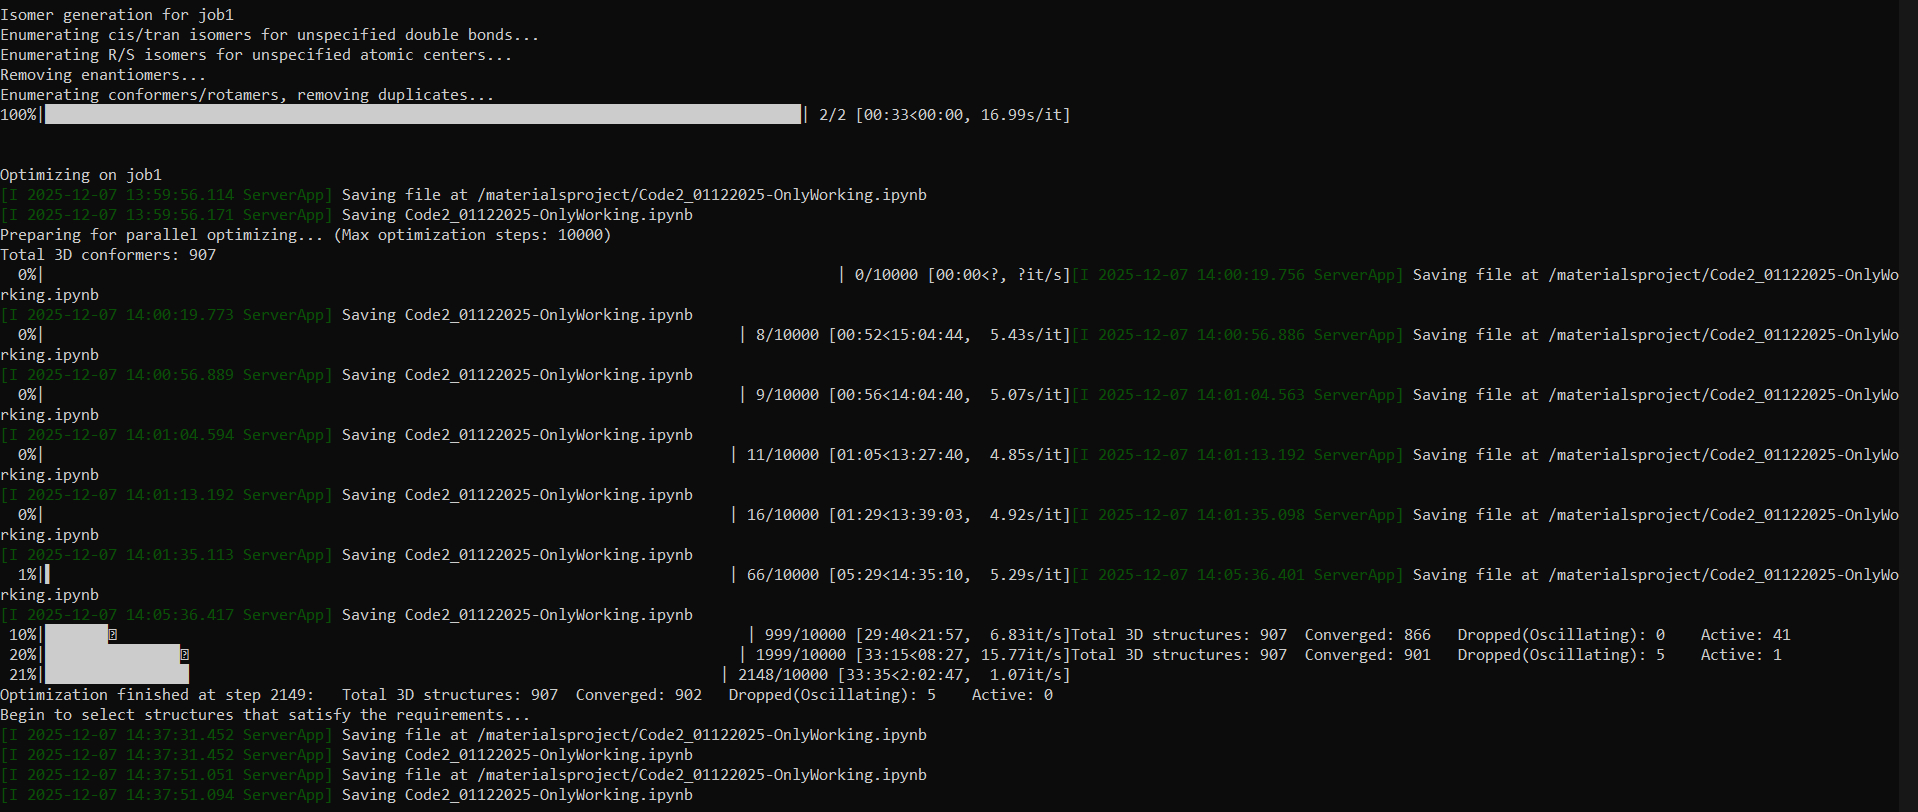

In [9]:
from IPython import display
display.Image("D:/C Drive Pictures/0792.png")

In [3]:
sm8='files\sm8_20251207-135906-822810\sm8_out.sdf'
mols = Chem.SDMolSupplier(sm8) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
print(mols)

In [7]:
# Example usage (replace 'your_file.sdf' with your actual file path)
sdf_content = read_raw_sdf(sm8)
print(sdf_content)

Cannabidiol
     RDKit          3D

 53 54  0  0  0  0  0  0  0  0999 V2000
   -0.6569   -2.3452    0.7038 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7995   -1.9217    0.1759 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5843   -2.7740   -0.7879 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3683   -0.5647    0.5095 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.8541   -0.6147    0.8441 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3249    0.7319    1.3752 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9027    1.8681    0.4820 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6014    3.1804    0.6768 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9366    1.7106   -0.4214 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1456    0.4460   -0.6406 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.6730    0.7389   -0.8512 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0320    0.1071   -1.8738 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6831   -0.7087   -2.7144 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3978    

In [8]:
for mol in mols:
       if mol is not None:  # Check if molecule was successfully read
           # Now you can work with the molecule object
           print(f"Molecule has {mol.GetNumAtoms()} atoms")
           # You can access properties, draw the molecule, etc.
           # For example, to get a specific property:
           if mol.HasProp('MolWeight'): # Check if the property exists
               print(f"Molecular weight: {mol.GetProp('MolWeight')}")
            # Iterate over all atoms in the molecule
           print("Atomic symbols in the molecule:")
           for atom in mol.GetAtoms():
               # Get the element key (atomic symbol)
               element_key = atom.GetSymbol()
               print(element_key)
       else:
           print("Failed to read a molecule from the SDF file.")
           print("Could not create molecule from SMILES.")

Molecule has 23 atoms
Atomic symbols in the molecule:
C
C
C
C
C
C
C
C
C
C
C
C
O
C
C
C
C
C
C
C
C
C
O


In [9]:
from rdkit.Chem import AllChem

molecules = [mol for mol in mols if mol is not None]
for mol in molecules:
    # Embed a 3D conformation
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    # Optimize the geometry
    AllChem.MMFFOptimizeMolecule(mol)

[11:17:03] Molecule does not have explicit Hs. Consider calling AddHs()
[11:17:03] Molecule does not have explicit Hs. Consider calling AddHs()


In [11]:
# Example using Py3Dmol for interactive 3D visualization
from IPython.display import display
import py3Dmol

# Assuming 'mol' is an RDKit molecule object with 3D coordinates
view = py3Dmol.view(width=1072, height=500, viewergrid=(1,2), linked=True)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}}, viewer=(0,0))
view.setStyle({'stick':{'linewidth':10}}, viewer=(0,1))
#view.getLegendColour()
#view.setStyle({'sphere':{}}, viewer=(0,2))
#view.zoomTo()
#view.show()
view.render()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [51]:
sm8='files\sm8_20251207-135906-822810\sm8_out.sdf'
glycine_mol = Chem.MolFromSmiles("C=C(C)C1CCC(C)=CC1c1c(O)cc(CCCCC)cc1O")
#glycine_mol = Chem.MolFromSmiles("C(C(=O)O)N")
alanine_mol = Chem.MolFromSmiles("CC(N)C(O)=O")
carbondio_mol = Chem.MolFromSmiles("C(=O)=O")
carbontrio_mol = Chem.MolFromSmiles("C(=O)([O])[O]")
#m = Chem.MolFromSmiles('C=C(C)C1CCC(C)=CC1c1c(O)cc(CCCCC)cc1O') #Canonical Cccccc1=Cc(=C(C(=C1)O)C2C=C(Ccc2C(=C)C)C)O
#mols = Chem.SDMolSupplier(m) #('files/smiles_20251202-163354-651198/smiles_out.sdf')
#mols = Chem.SanitizeMol(mols)
#print(mols)

ms = [alanine_mol, glycine_mol, carbondio_mol, carbontrio_mol]
#fps = [Chem.RDKFingerprint(x) for x in ms]
#print(DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity))
#print(DataStructs.FingerprintSimilarity(fps[1],fps[2], metric=DataStructs.DiceSimilarity))

from rdkit.Chem import Descriptors
Descriptors.TPSA(glycine_mol)

AllChem.ComputeGasteigerCharges(glycine_mol)
glycine_mol
glycine_mol_charges = Chem.Mol(glycine_mol)
for at in glycine_mol_charges.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
glycine_mol_charges

#contribs = [glycine_mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(glycine_mol.GetNumAtoms())]
#d2d = Draw.MolDraw2DCairo(400, 400)
#_ = SimilarityMaps.GetSimilarityMapFromWeights(glycine_mol, contribs, d2d, colorMap='jet', contourLines=10)

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import py3Dmol
from IPython.display import display, HTML

# ---------------------------------------------------------------------
# Function to extract RDKit's default atom colour palette (used also by Py3Dmol)
# ---------------------------------------------------------------------
def getLegendColour():
    """
    Returns RDKit’s default atom color palette used in molecular rendering.
    Output format:
        { 'C': '#333333', 'H': '#FFFFFF', 'N': '#0000CC', ... }
    """
    opts = rdMolDraw2D.MolDrawOptions()
    palette = opts.getLegendColour() #atomColourPalette  # atomic_num → (r,g,b)

    pt = Chem.GetPeriodicTable()
    legend = {}
    '''
    for atomic_num, rgb in palette.items():
        symbol = pt.GetElementSymbol(atomic_num)
        # Convert float RGB (0-1) → hex
        hex_col = '#%02x%02x%02x' % (
            int(rgb[0] * 255),
            int(rgb[1] * 255),
            int(rgb[2] * 255)
        )
        legend[symbol] = hex_col
    '''
    return legend

# Optional: Visual display of legend
def showColourLegend(legend_dict):
    html = "<h3>RDKit/Py3Dmol Atom Colour Legend</h3><table>"
    for elem, col in legend_dict.items():
        html += f"<tr><td>{elem}</td><td><div style='width:40px;height:15px;background:{col}'></div></td></tr>"
    html += "</table>"
    display(HTML(html))


# ---------------------------------------------------------------------
# Load SDF molecules
# ---------------------------------------------------------------------
sm8 = r'files\sm8_20251207-135906-822810\sm8_out.sdf'
mols = Chem.SDMolSupplier(sm8)
print(mols)

# Read raw SDF
def read_raw_sdf(path):
    with open(path, 'r') as f:
        return f.read()

sdf_content = read_raw_sdf(sm8)
print(sdf_content)

# Validate molecules and print details
for mol in mols:
    if mol is not None:
        print(f"Molecule has {mol.GetNumAtoms()} atoms")
        print("Atomic symbols in the molecule:")
        for atom in mol.GetAtoms():
            print(atom.GetSymbol())
    else:
        print("Failed to read a molecule from the SDF file.")

# ---------------------------------------------------------------------
# Generate 3D geometry
# ---------------------------------------------------------------------
molecules = [mol for mol in mols if mol is not None]

for mol in molecules:
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.MMFFOptimizeMolecule(mol)

# ---------------------------------------------------------------------
# Py3Dmol visualization
# ---------------------------------------------------------------------
# Assuming we want to visualize the first molecule
mol = molecules[0]

view = py3Dmol.view(width=1072, height=500, viewergrid=(1, 2), linked=True)
view.addModel(Chem.MolToMolBlock(mol), 'sdf')

# Left: sticks+ spheres
view.setStyle({'stick':{}, "sphere": {"scale": 0.30}}, viewer=(0, 0))

# Right: thick sticks
view.setStyle({'stick': {'linewidth': 10}}, viewer=(0, 1))

# ---------------------------------------------------------------------
# Retrieve and show the color palette used in the model
# ---------------------------------------------------------------------
legend = getLegendColour()
print("Atom colour legend:", legend)

# If you want the legend displayed
showColourLegend(legend)

view.render()


Cannabidiol
     RDKit          3D

 53 54  0  0  0  0  0  0  0  0999 V2000
   -0.6569   -2.3452    0.7038 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7995   -1.9217    0.1759 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5843   -2.7740   -0.7879 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3683   -0.5647    0.5095 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.8541   -0.6147    0.8441 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3249    0.7319    1.3752 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9027    1.8681    0.4820 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6014    3.1804    0.6768 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9366    1.7106   -0.4214 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1456    0.4460   -0.6406 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.6730    0.7389   -0.8512 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0320    0.1071   -1.8738 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6831   -0.7087   -2.7144 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3978    

[20:39:30] Molecule does not have explicit Hs. Consider calling AddHs()
[20:39:30] Molecule does not have explicit Hs. Consider calling AddHs()


Atom colour legend: {}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [51]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import rdDistGeom
import matplotlib.pyplot as plt
import seaborn as sns

# visualize element colors
sns.set(style="ticks")
# Plotting the element colors with names
fig, ax = plt.subplots(figsize=(0.9*len(element_colors), 2), dpi=300)
# Loop through the elements and plot circles with names horizontally
for idx, (element, color) in enumerate(element_colors.items()):
    ax.add_patch(plt.Circle((idx * 0.08, 0.10), 0.02, color=color, ec="none"))
    ax.text(idx * 0.08, 0.05, element, fontsize=10, va="center", ha="center", rotation=0)
# Set limits and turn off axis
ax.set_xlim(-0.1, len(element_colors) * 0.08)
ax.set_ylim(0, 0.2)
ax.axis('off')
# plt.savefig('element_colors.pdf', bbox_inches='tight')
# plt.show()

NameError: name 'element_colors' is not defined

In [36]:
IPythonConsole.drawMols3D(mols)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
view.render()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

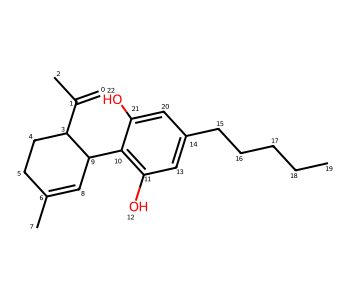

In [49]:
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = (350,300)
m = Chem.MolFromSmiles('C=C(C)C1CCC(C)=CC1c1c(O)cc(CCCCC)cc1O') #Canonical Cccccc1=Cc(=C(C(=C1)O)C2C=C(Ccc2C(=C)C)C)O
m
#img = Draw.MolToImage(m)
#img

In [19]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('Cccccc1=Cc(=C(C(=C1)O)C2C=C(Ccc2C(=C)C)C)O') #Canonical 
img = Draw.MolToImage(m)
img

[14:40:09] non-ring atom 1 marked aromatic


ValueError: Null molecule provided

[20:59:00] Molecule does not have explicit Hs. Consider calling AddHs()


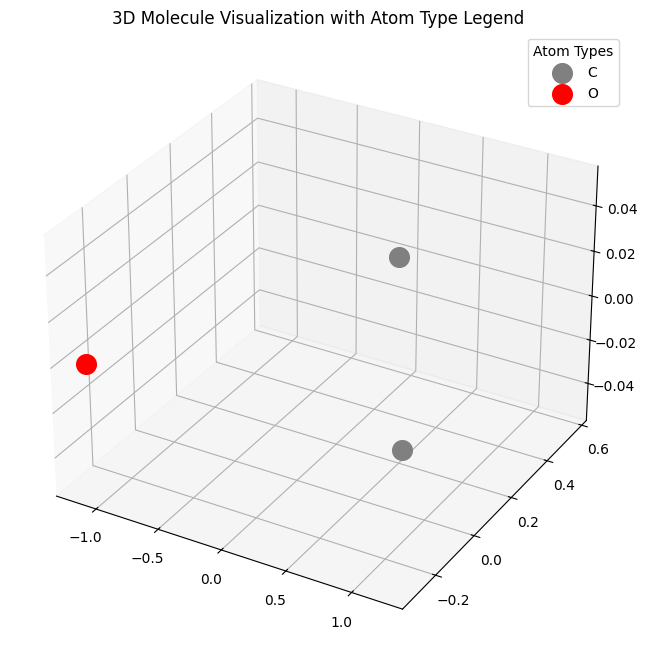

In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a molecule and generate 3D coordinates
mol = Chem.MolFromSmiles('CCO')
AllChem.EmbedMolecule(mol, AllChem.ETKDG())

# Define a color palette for atom types
atom_colors = {
    6: 'gray',   # Carbon
    8: 'red',    # Oxygen
    1: 'white'   # Hydrogen
}

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot atoms and create legend entries
for atom in mol.GetAtoms():
    pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
    atomic_num = atom.GetAtomicNum()
    color = atom_colors.get(atomic_num, 'black') # Default to black if not in palette
    element_symbol = atom.GetSymbol()

    ax.scatter(pos.x, pos.y, pos.z, c=color, s=200, label=element_symbol)

# Remove duplicate labels from the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Atom Types")

ax.set_title("3D Molecule Visualization with Atom Type Legend")
plt.show()

In [37]:
import pandas as pd
from io import StringIO
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True  # Use higher quality images for molecules
import py3Dmol
from ipywidgets import interact, Dropdown

In [38]:
data_set = StringIO(
    """names,smiles
Amigdalin,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1
Fenfuram,Cc1occc1C(=O)Nc1ccccc1
citral,CC(C)=CCCC(C)=CC=O
Picene,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
Thiophene,c1ccsc1
benzothiazole,c1ccc2scnc2c1
"2,2,4,6,6'-PCB",Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1
Estradiol,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O
Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
Rotenone,C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1
2-pyrrolidone,O=C1CCCN1
2-Chloronapthalene,Clc1ccc2ccccc2c1
1-Pentene ,C=CCCC
Primidone,CCC1(c2ccccc2)C(=O)NCNC1=O
Tetradecane,CCCCCCCCCCCCCC
2-Chloropropane,CC(C)Cl
2-Methylbutanol,CCC(C)CO
Benzonitrile,N#Cc1ccccc1
Diazinon,CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1
2-Undecanol,CCCCCCCCCC(C)O"""
)

In [39]:
table = pd.read_csv(data_set)
table

,names,smiles
0,Amigdalin,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...
1,Fenfuram,Cc1occc1C(=O)Nc1ccccc1
2,citral,CC(C)=CCCC(C)=CC=O
3,Picene,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
4,Thiophene,c1ccsc1
5,benzothiazole,c1ccc2scnc2c1
6,"2,2,4,6,6'-PCB",Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1
7,Estradiol,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O
8,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
9,Rotenone,C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1


In [40]:
def molecule_to_3d(molecule):
    """Add 3D coordinates for RDKit molecules."""
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol


def molecules_from_smiles(smiles):
    """Generate RDKit molecules from smiles."""
    molecules = []
    for smilei in smiles:
        mol = Chem.MolFromSmiles(smilei)
        rdCoordGen.AddCoords(mol)
        molecules.append(mol)
    return molecules

In [41]:
names = table["names"].values
smiles = table["smiles"].values

molecules = molecules_from_smiles(smiles)
molecules_3d = [molecule_to_3d(i) for i in molecules]

In [42]:
def view_2d(molecule):
    return molecule


molecules_options = [(i, j) for i, j in zip(names, molecules)]

dropdown = Dropdown(
    options=molecules_options, value=molecules[0], description="Molecule:"
)

interact(
    view_2d,
    molecule=dropdown,
)

interactive(children=(Dropdown(description='Molecule:', options=(('Amigdalin', <rdkit.Chem.rdchem.Mol object a…

<function __main__.view_2d(molecule)>

In [43]:
def view_3d(molecule):
    view = py3Dmol.view(
        data=Chem.MolToMolBlock(molecule),  # Convert the RDKit molecule for py3Dmol
        style={"stick": {}, "sphere": {"scale": 0.3}}
    )
    view.zoomTo()
    return view


molecules_options = [(i, j) for i, j in zip(names, molecules_3d)]

dropdown = Dropdown(
    options=molecules_options, value=molecules_3d[0], description="Molecule:"
)

interact(
    view_3d,
    molecule=dropdown,
)

interactive(children=(Dropdown(description='Molecule:', options=(('Amigdalin', <rdkit.Chem.rdchem.Mol object a…

<function __main__.view_3d(molecule)>

In [ ]:
# Core libraries
import os
import sys
import warnings
#warnings.filterwarnings('ignore')
from pathlib import Path
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple, Any, Optional
import json
import pickle
from datetime import datetime
import time
from tqdm.auto import tqdm

# Chemistry libraries
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, rdMolDescriptors, rdDepictor
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import MolStandardize
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

# Visualization
import py3Dmol
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from PIL import Image
import nglview as nv

# Molecular dynamics and quantum chemistry
import mdtraj as md
import openmm as mm
from openmm import app
from openmm import unit
#from pyscf import gto, scf, dft, cc, mp
from ase import Atoms
from ase.calculators.emt import EMT
from ase.visualize import view

# Machine learning and data analysis
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy import stats, spatial
import networkx as nx
from scipy.spatial.distance import cdist

# Custom imports for our workflow
import io
import logging
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
import multiprocessing as mp
from collections import defaultdict, Counter

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterCatalogEntry> already registered; second conversion method ignored.
